In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import fnmatch
from math import sqrt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Creating a data frame with the closing prices of 30 different stocks, with 10 from each of the caps.
caps = ["Large_Cap",
        "Mid_Cap",
        "Small_Cap"
        ]
final = pd.DataFrame()
dfs = {}
for i in caps:
    j=1   
    for file_name in os.listdir('Data/'+f"{i}"):        
        if fnmatch.fnmatch(file_name, '*.csv') and j<11:
            name = file_name.split('.')[0]  
            dfs[name] = pd.read_csv(f'Data/{i}/{file_name}')  
            dfs[name] = dfs[name][dfs[name]["Series"] == "EQ"]   
            dfs[name].Date = pd.to_datetime(dfs[name]['Date'])
            dfs[name] = dfs[name].set_index('Date')
            final[name] = (dfs[name]['Close Price'])       
            j +=1

In [3]:
final.head()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJFINANCE,BPCL,CIPLA,DRREDDY,EICHERMOT,GAIL,HDFC,...,ASHOKA,BAJAJELEC,BOMDYEING,CENTURYPLY,FORTIS,GUJALKALI,IDFC,IRCON,ITDC,JETAIRWAYS
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,356.20,1148.05,500.1,1332.95,727.85,569.00,2675.80,28930.60,414.00,1559.50,...,216.05,341.15,82.20,266.65,205.25,457.35,63.70,NaN,650.15,527.50
2017-05-16,354.50,1142.85,501.5,1347.75,733.30,565.60,2724.10,29362.50,411.40,1566.55,...,214.90,347.00,83.40,266.10,207.90,455.25,64.25,NaN,636.70,534.15
2017-05-17,348.55,1154.95,502.8,1324.80,727.45,562.35,2736.90,29093.55,408.30,1552.50,...,217.00,349.85,82.25,264.85,205.90,472.65,63.35,NaN,626.75,528.90
2017-05-18,347.90,1151.35,492.0,1314.55,714.90,560.10,2678.95,28357.30,404.75,1537.05,...,209.65,334.10,78.95,260.35,196.85,461.85,61.50,NaN,604.65,522.70
2017-05-19,349.45,1123.15,501.7,1289.15,702.45,564.95,2656.45,27936.05,401.05,1520.60,...,206.25,336.20,77.15,254.05,203.55,455.35,61.15,NaN,594.30,520.40


In [4]:
#Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period.
final = final.dropna()
df = final.pct_change().mean() * 252
df = pd.DataFrame(df)
df.columns = ['df']
df['Volatility'] = final.pct_change().std() * sqrt(252)
df

,df,Volatility
ADANIPORTS,0.304755,0.362600
ASIANPAINT,0.232954,0.219526
AXISBANK,0.539191,0.240850
BAJFINANCE,0.456859,0.257353
BPCL,0.619843,0.352893
CIPLA,-0.186271,0.232783
DRREDDY,0.180486,0.248224
EICHERMOT,-0.160101,0.351505
GAIL,-0.119896,0.276772
HDFC,0.324531,0.216785


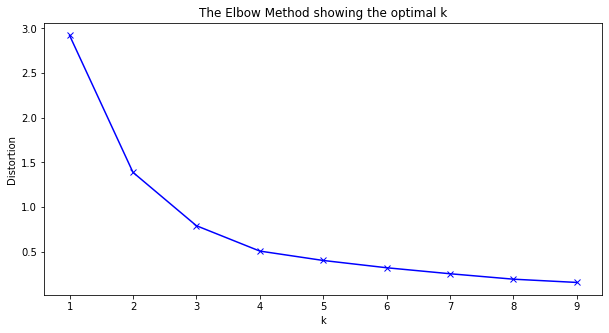

In [5]:
#Clustering the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. 
#Identifying the optimum number of clusters using the Elbow curve method
data = df
mms = MinMaxScaler()
mms.fit(data)
transformedData = mms.transform(data)

distances = []
helhelo
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(transformedData)
    distances.append(km.inertia_)

plt.subplots(figsize=(10, 5))
plt.plot(K, distances, 'bx-')

plt.xticks(K)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

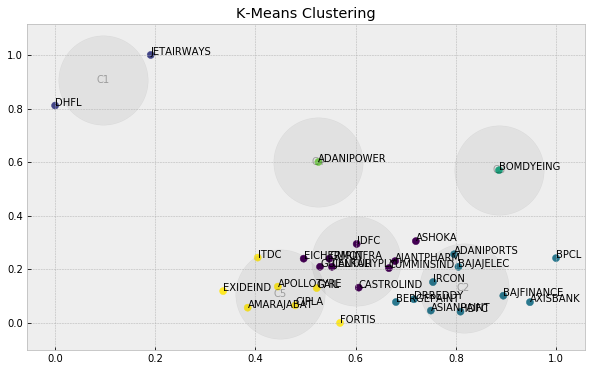

In [7]:
k=6
km = KMeans(n_clusters=k)
km = km.fit(transformedData)
df['labels'] = km.labels_
centers = km.cluster_centers_
y = km.predict(transformedData)

plt.style.use('bmh')
plt.subplots(figsize=(10, 6))

plt.scatter(transformedData[:, 0], transformedData[:, 1], c=y, s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=8000 , alpha =0.05  )

for x, y, name in zip(transformedData[:, 0], transformedData[:, 1], data.index):
    plt.text(x,y,name)

for i, cord in enumerate(centers):
    plt.text(cord[0], cord[1], f"C{i}",horizontalalignment='center',verticalalignment='center',alpha=0.3 )

plt.title('K-Means Clustering')
plt.show()